
== 성능 평가 결과 ==
MAE (Mean Absolute Error): 37.40
MSE (Mean Squared Error): 2389.93
R² Score: 0.37


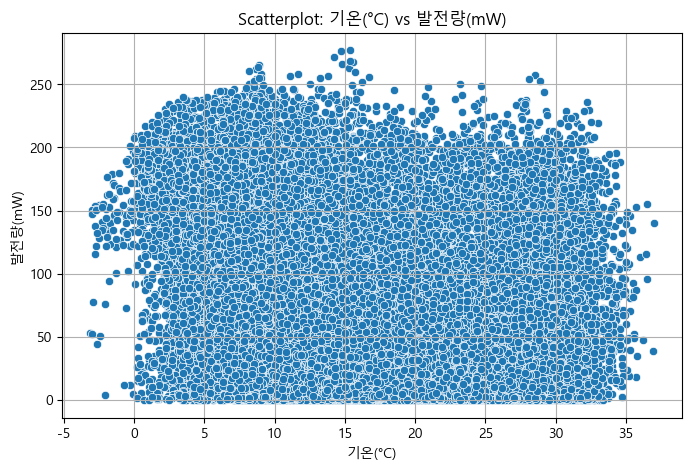

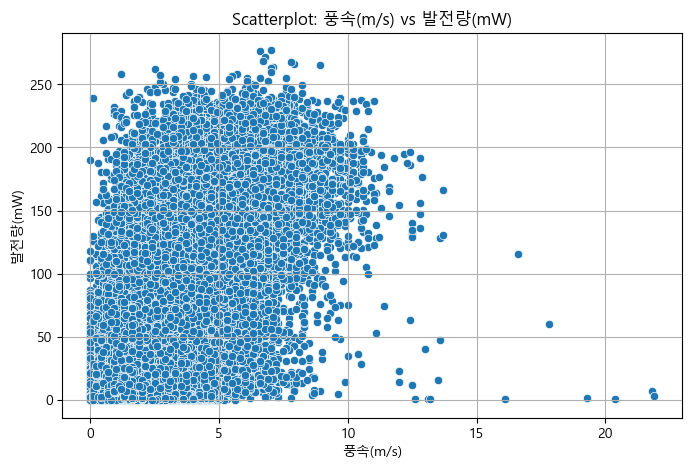

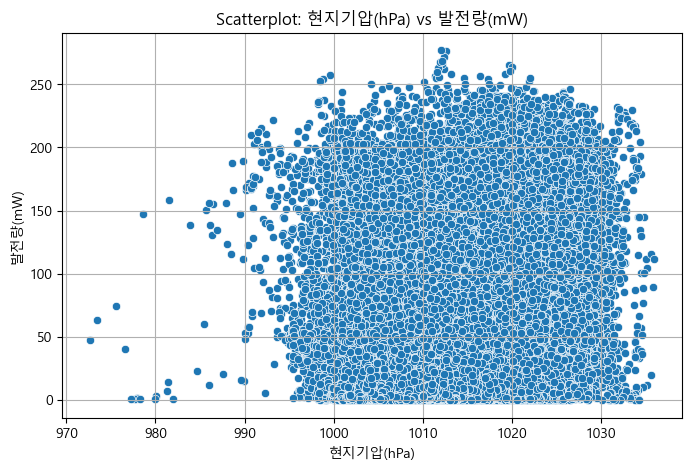

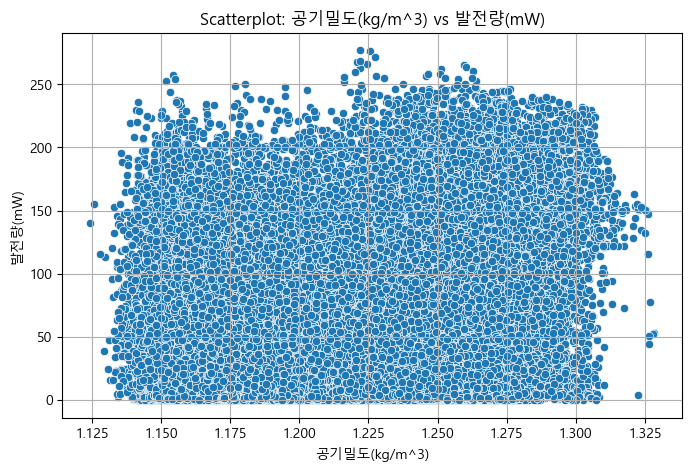

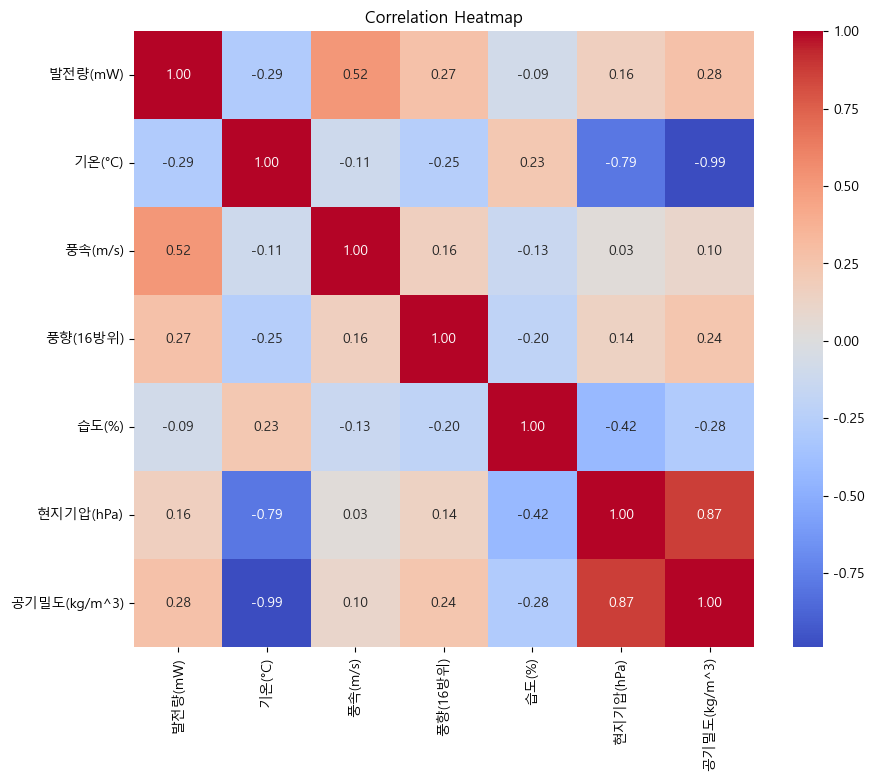


데이터프레임 컬럼 목록:
['지역', '일시', '발전량(mW)', '기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '현지기압(hPa)', '공기밀도(kg/m^3)']


In [5]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트깨짐 방지 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
file_path = "./processed/test_data.csv"
data = pd.read_csv(file_path, encoding='EUC-KR')

# 공기밀도(kg/m^3) 계산
R = 287.05  # 공기 상수 (J/kg·K)
data["공기밀도(kg/m^3)"] = data["현지기압(hPa)"] * 100 / (R * (data["기온(°C)"] + 273.15))

# 변수 적용
X = data[["기온(°C)", "풍속(m/s)", "현지기압(hPa)", "공기밀도(kg/m^3)"]]
y = data["발전량(mW)"]  # 출력 변수

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("\n== 성능 평가 결과 ==")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
# print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
# =============================================================================
# == 성능 평가 결과 ==
# MAE (Mean Absolute Error): 37.38(발전량 예측에서 평균적으로 37.38mW의 오차가 발생)
# MSE (Mean Squared Error): 2388.75(예측값은 실제값으로부터 약 48.87mW 정도 벗어남)
# RMSE (Root Mean Squared Error):48.87(예측값은 실제값으로부터 약 48.87mW 정도 벗어남)
# R² Score: 0.37(37%만 설명할 수 있다는 의미)
# =============================================================================

# 산점도 시각화
features = ["기온(°C)", "풍속(m/s)", "현지기압(hPa)", "공기밀도(kg/m^3)"]
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=data["발전량(mW)"])
    plt.title(f"Scatterplot: {feature} vs 발전량(mW)")
    plt.xlabel(feature)
    plt.ylabel("발전량(mW)")
    plt.grid(True)
    plt.show()

# 상관계수 히트맵
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# 데이터프레임 컬럼 확인
print("\n데이터프레임 컬럼 목록:")
print(data.columns.tolist())